<a href="https://colab.research.google.com/github/Krish5118/Cancer/blob/main/cervical_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cervical-cancer-largest-dataset-sipakmed/im_Parabasal/im_Parabasal/106_cyt01.dat
/kaggle/input/cervical-cancer-largest-dataset-sipakmed/im_Parabasal/im_Parabasal/094_cyt02.dat
/kaggle/input/cervical-cancer-largest-dataset-sipakmed/im_Parabasal/im_Parabasal/001_cyt08.dat
/kaggle/input/cervical-cancer-largest-dataset-sipakmed/im_Parabasal/im_Parabasal/019_nuc09.dat
/kaggle/input/cervical-cancer-largest-dataset-sipakmed/im_Parabasal/im_Parabasal/045_nuc02.dat
/kaggle/input/cervical-cancer-largest-dataset-sipakmed/im_Parabasal/im_Parabasal/096_nuc08.dat
/kaggle/input/cervical-cancer-largest-dataset-sipakmed/im_Parabasal/im_Parabasal/042_nuc01.dat
/kaggle/input/cervical-cancer-largest-dataset-sipakmed/im_Parabasal/im_Parabasal/034_nuc05.dat
/kaggle/input/cervical-cancer-largest-dataset-sipakmed/im_Parabasal/im_Parabasal/041_nuc05.dat
/kaggle/input/cervical-cancer-largest-dataset-sipakmed/im_Parabasal/im_Parabasal/096_nuc07.dat
/kaggle/input/cervical-cancer-largest-dataset-sipa

In [ ]:
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [ ]:
base_dir = "/kaggle/input/cervical-cancer-largest-dataset-sipakmed"
categories = ["im_Dyskeratotic", "im_Koilocytotic", "im_Metaplastic",
              "im_Parabasal", "im_Superficial-Intermediate"]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid")

In [ ]:
image_counts = {}

for category in categories:
    category_path = os.path.join(base_dir, category, category, "CROPPED")
    image_counts[category] = len([f for f in os.listdir(category_path) if f.endswith(('.bmp', '.jpg', '.png'))])

print(image_counts)

{'im_Dyskeratotic': 813, 'im_Koilocytotic': 825, 'im_Metaplastic': 793, 'im_Parabasal': 787, 'im_Superficial-Intermediate': 831}


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


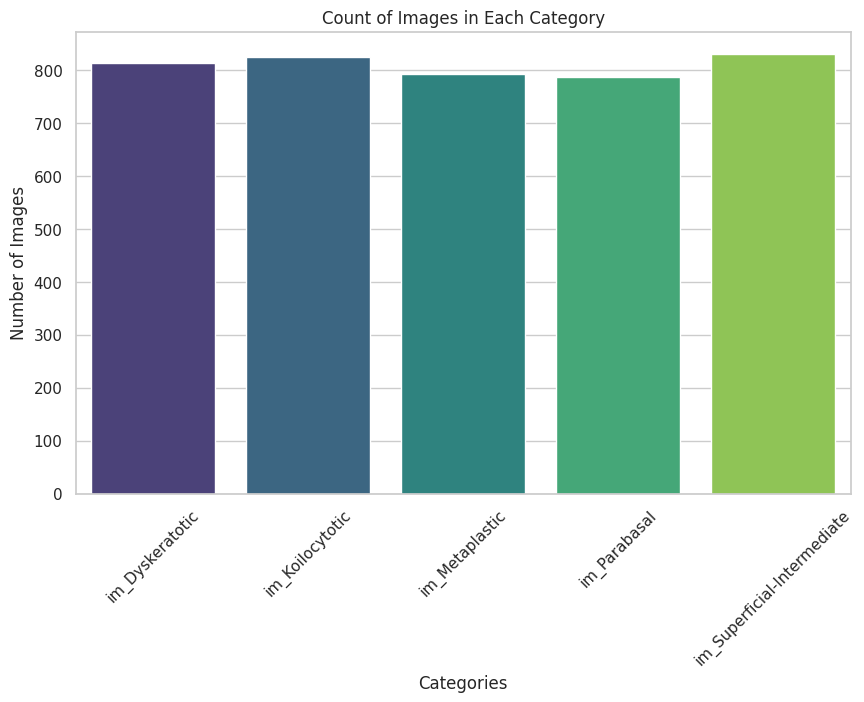

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()), palette='viridis')
plt.title('Count of Images in Each Category')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

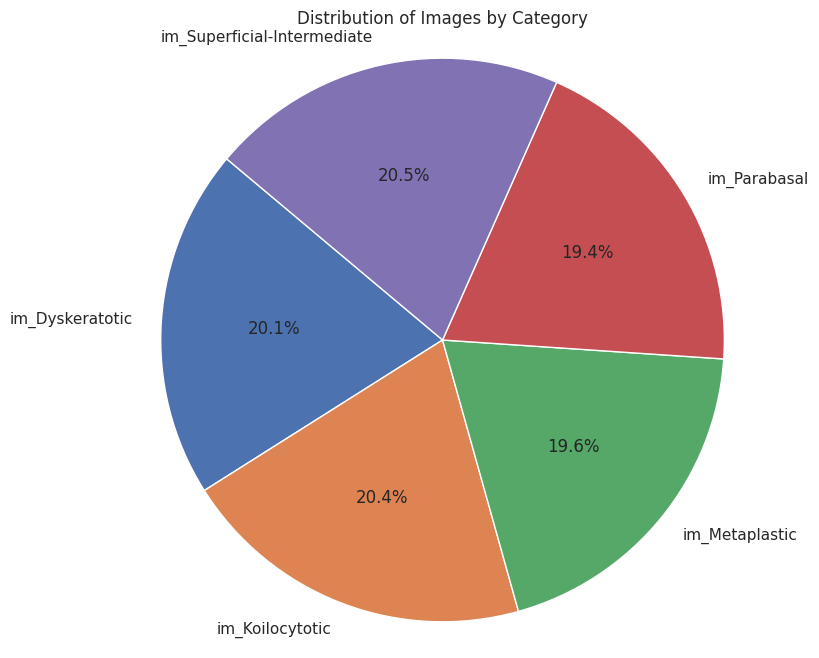

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(image_counts.values(), labels=image_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Images by Category')
plt.axis('equal')
plt.show()

In [ ]:
import cv2

In [ ]:
def display_images_from_folders(base_dir, categories, num_images=5):
    plt.figure(figsize=(15, 10))

    for i, category in enumerate(categories):
        category_path = os.path.join(base_dir, category, category, "CROPPED")
        image_files = [f for f in os.listdir(category_path) if f.endswith(('.bmp', '.jpg', '.png'))]

        for j, image_file in enumerate(image_files[:num_images]):

            img_path = os.path.join(category_path, image_file)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

            plt.subplot(len(categories), num_images, i * num_images + j + 1)
            plt.imshow(image)
            plt.axis('off')
            plt.title(f"{category}")

    plt.tight_layout()
    plt.show()

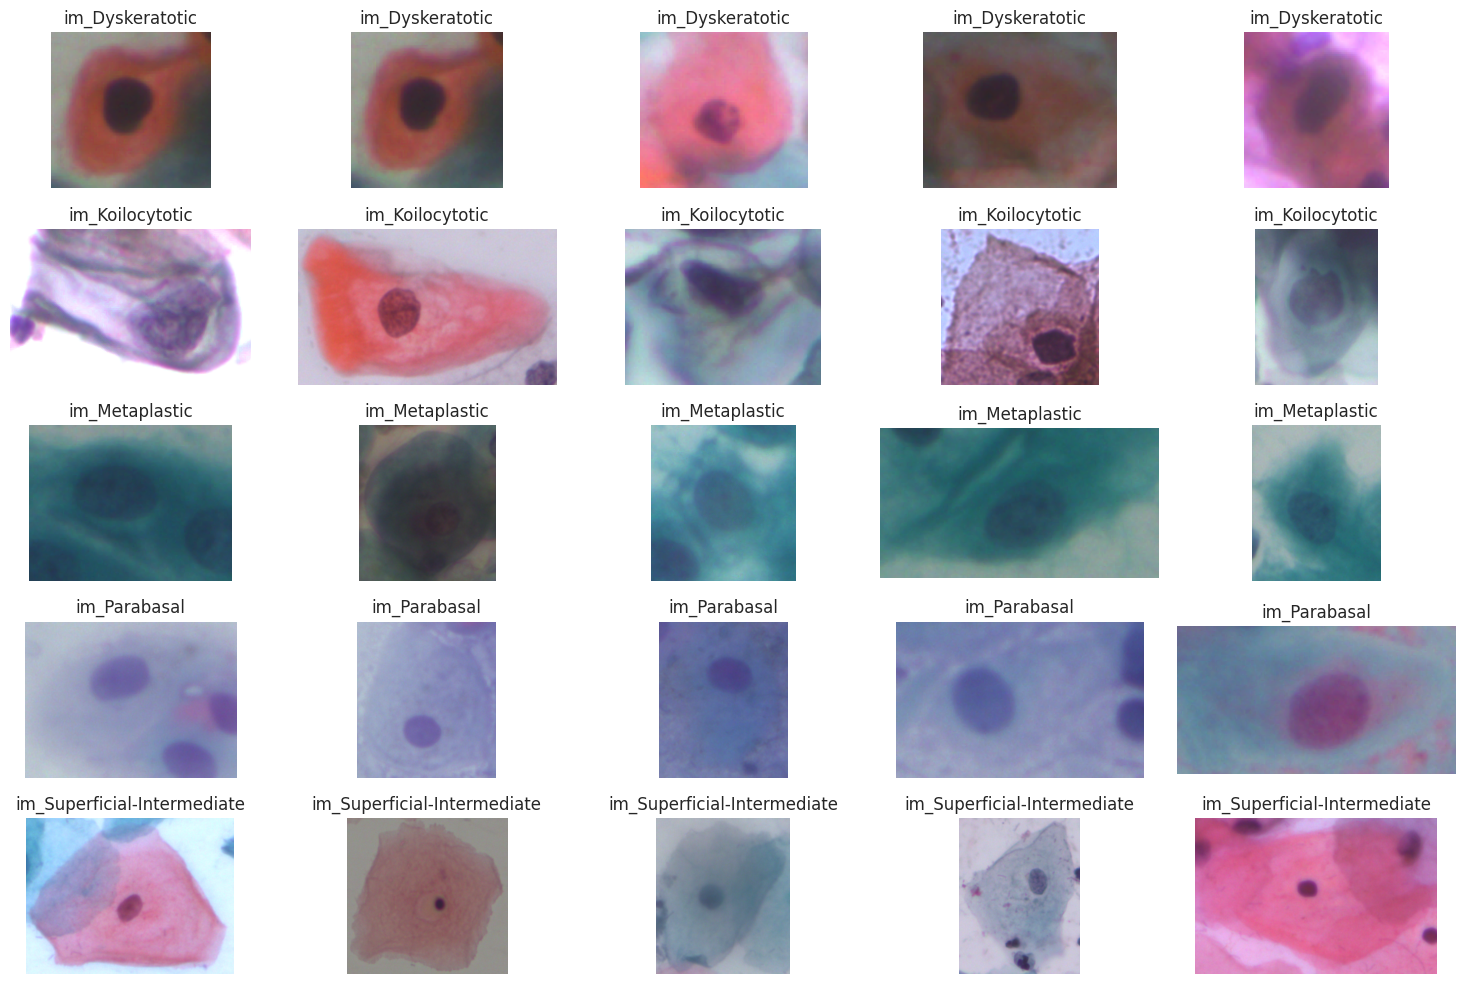

In [ ]:
display_images_from_folders(base_dir, categories, num_images=5)

In [ ]:
def create_image_paths_dataframe(base_dir, categories):
    data = []

    for category in categories:
        category_path = os.path.join(base_dir, category, category, "CROPPED")

        image_files = [f for f in os.listdir(category_path) if f.endswith(('.bmp', '.jpg', '.png'))]

        for image_file in image_files:
            img_path = os.path.join(category_path, image_file)
            data.append({'image_path': img_path, 'label': category})

    df_image_paths = pd.DataFrame(data)

    return df_image_paths

In [ ]:
df_image_paths = create_image_paths_dataframe(base_dir, categories)

In [ ]:
df_image_paths.head()

image_path            label
0  /kaggle/input/cervical-cancer-largest-dataset-...  im_Dyskeratotic
1  /kaggle/input/cervical-cancer-largest-dataset-...  im_Dyskeratotic
2  /kaggle/input/cervical-cancer-largest-dataset-...  im_Dyskeratotic
3  /kaggle/input/cervical-cancer-largest-dataset-...  im_Dyskeratotic
4  /kaggle/input/cervical-cancer-largest-dataset-...  im_Dyskeratotic

In [ ]:
df_image_paths.tail()

image_path  \
4044  /kaggle/input/cervical-cancer-largest-dataset-...   
4045  /kaggle/input/cervical-cancer-largest-dataset-...   
4046  /kaggle/input/cervical-cancer-largest-dataset-...   
4047  /kaggle/input/cervical-cancer-largest-dataset-...   
4048  /kaggle/input/cervical-cancer-largest-dataset-...   

                            label  
4044  im_Superficial-Intermediate  
4045  im_Superficial-Intermediate  
4046  im_Superficial-Intermediate  
4047  im_Superficial-Intermediate  
4048  im_Superficial-Intermediate

In [ ]:
df_image_paths['label'].unique()

array(['im_Dyskeratotic', 'im_Koilocytotic', 'im_Metaplastic',
       'im_Parabasal', 'im_Superficial-Intermediate'], dtype=object)

In [ ]:
df_image_paths['label'].value_counts()

label
im_Superficial-Intermediate    831
im_Koilocytotic                825
im_Dyskeratotic                813
im_Metaplastic                 793
im_Parabasal                   787
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df_image_paths[['image_path']], df_image_paths['label'])

In [ ]:
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['label'] = y_resampled

In [ ]:
print("\nClass distribution after oversampling:")
print(df_resampled['label'].value_counts())


Class distribution after oversampling:
label
im_Dyskeratotic                831
im_Koilocytotic                831
im_Metaplastic                 831
im_Parabasal                   831
im_Superficial-Intermediate    831
Name: count, dtype: int64


In [ ]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [ ]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4155 entries, 0 to 4154
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  4155 non-null   object
 1   label       4155 non-null   object
dtypes: object(2)
memory usage: 65.0+ KB


In [ ]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,
    shuffle=True,
    random_state=42,
    stratify=df_resampled['label']
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['label']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',
    y_col='label',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',
    y_col='label',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path',
    y_col='label',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)

Found 3324 validated image filenames belonging to 5 classes.
Found 415 validated image filenames belonging to 5 classes.
Found 416 validated image filenames belonging to 5 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using GPU


In [ ]:
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

input_shape = (224, 224, 3)
num_classes = len(train_gen_new.class_indices)

cnn_model = create_cnn_model(input_shape, num_classes)

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10


I0000 00:00:1730019624.734712     106 service.cc:145] XLA service 0x7e7fcc006660 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730019624.734776     106 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1730019624.734782     106 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  1/208 ━━━━━━━━━━━━━━━━━━━━ 30:39 9s/step - accuracy: 0.1250 - loss: 1.6173

I0000 00:00:1730019630.720076     106 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


208/208 ━━━━━━━━━━━━━━━━━━━━ 46s 177ms/step - accuracy: 0.5014 - loss: 1.3844 - val_accuracy: 0.6024 - val_loss: 1.0073
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.6941 - loss: 0.8327 - val_accuracy: 0.8000 - val_loss: 0.5798
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.7710 - loss: 0.6389 - val_accuracy: 0.8000 - val_loss: 0.5016
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.8000 - loss: 0.5287 - val_accuracy: 0.8241 - val_loss: 0.4838
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.8310 - loss: 0.4867 - val_accuracy: 0.8578 - val_loss: 0.4027
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.8512 - loss: 0.4284 - val_accuracy: 0.7735 - val_loss: 0.7389
Epoch 7/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.8501 - loss: 0.4249 - val_accuracy: 0.8602 - val_loss: 0.3872
Epoch 8/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.8931 - loss: 0.2946 - val_accuracy: 0.8

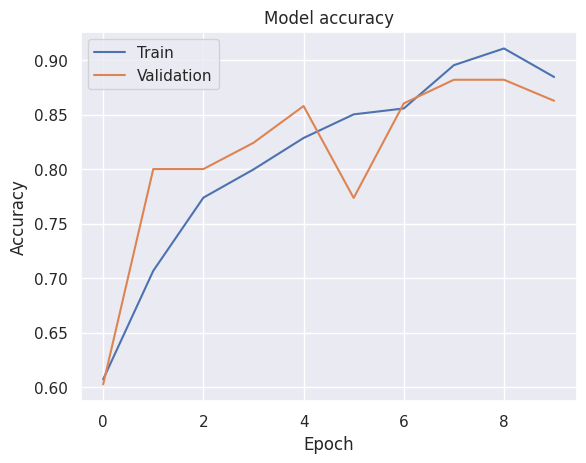

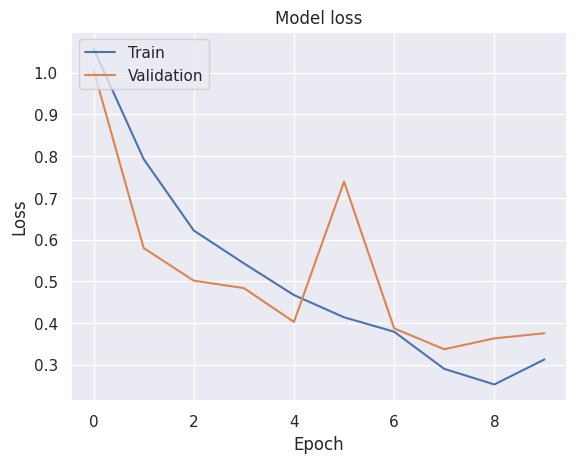

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

                             precision    recall  f1-score   support

            im_Dyskeratotic       0.95      0.89      0.92        83
            im_Koilocytotic       0.86      0.82      0.84        83
             im_Metaplastic       0.79      0.93      0.85        83
               im_Parabasal       0.90      0.93      0.91        84
im_Superficial-Intermediate       0.93      0.83      0.88        83

                   accuracy                           0.88       416
                  macro avg       0.88      0.88      0.88       416
               weighted avg       0.88      0.88      0.88       416



In [ ]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

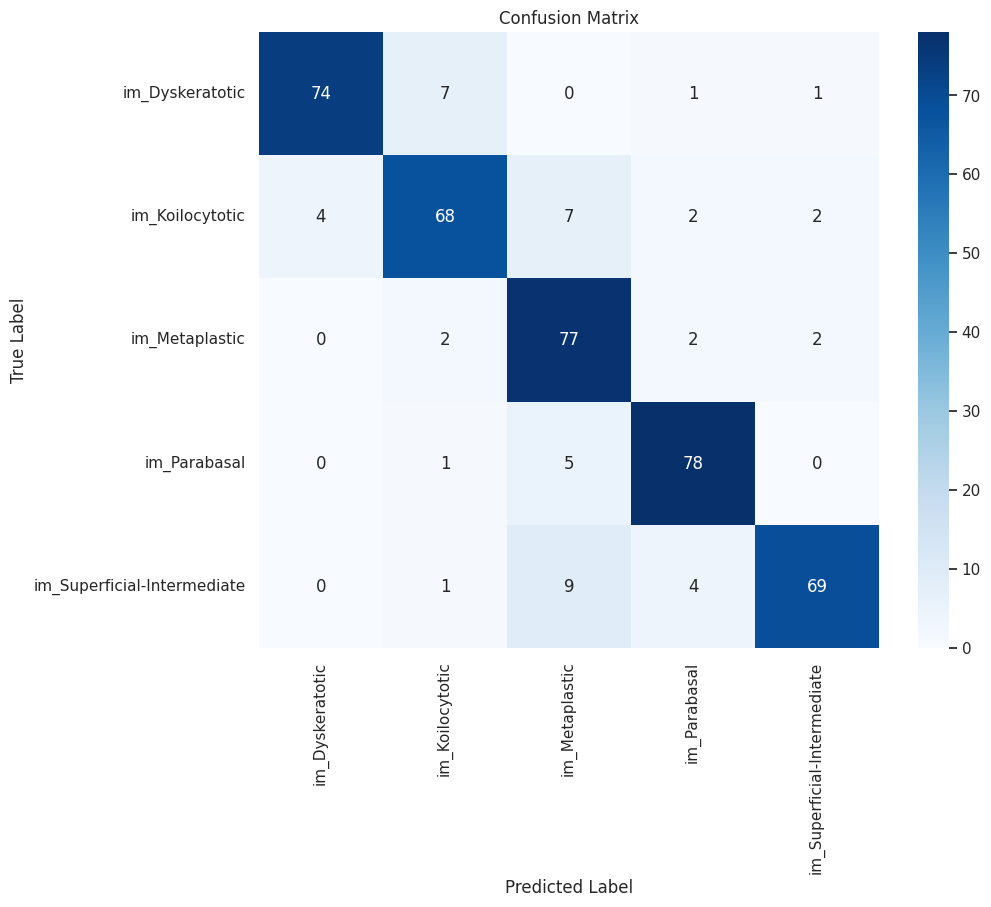

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from tensorflow.keras.applications import InceptionV3

In [ ]:
def create_inception_model(input_shape):

    base_model = InceptionV3(weights='imagenet', input_shape=input_shape, include_top=False)


    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential()
    model.add(base_model)

    model.add(GaussianNoise(0.25))

    model.add(GlobalAveragePooling2D())

    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(GaussianNoise(0.25))
    model.add(Dropout(0.25))

    model.add(Dense(5, activation='softmax'))

    return model

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise

In [ ]:
input_shape = (224, 224, 3)
cnn_model = create_inception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 52s 157ms/step - accuracy: 0.6122 - loss: 1.0785 - val_accuracy: 0.8289 - val_loss: 0.5069
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.8459 - loss: 0.4231 - val_accuracy: 0.8458 - val_loss: 0.5198
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.8741 - loss: 0.3570 - val_accuracy: 0.8867 - val_loss: 0.3950
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.8963 - loss: 0.2825 - val_accuracy: 0.8747 - val_loss: 0.4035
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.9205 - loss: 0.2200 - val_accuracy: 0.8602 - val_loss: 0.4187


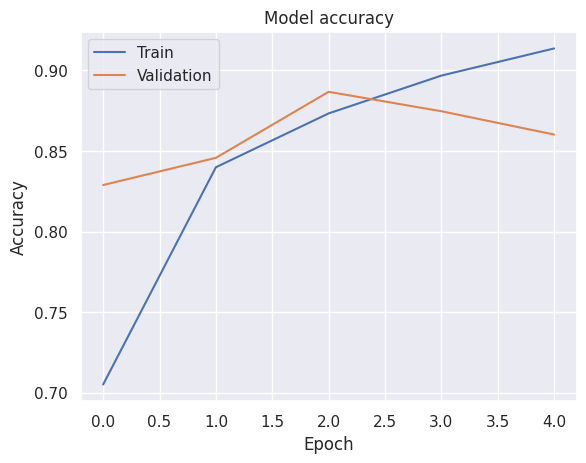

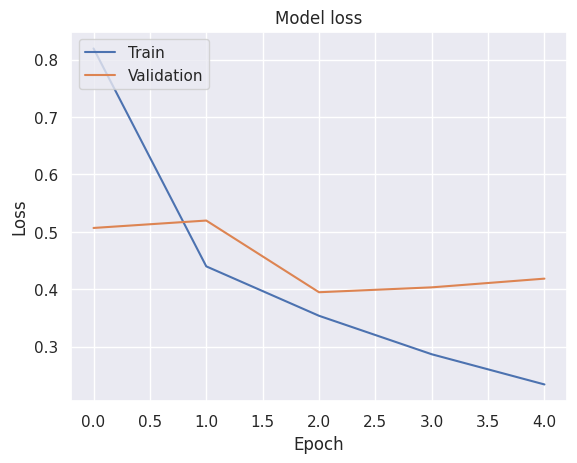

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

                             precision    recall  f1-score   support

            im_Dyskeratotic       0.89      0.70      0.78        83
            im_Koilocytotic       0.62      0.80      0.70        83
             im_Metaplastic       0.85      0.66      0.74        83
               im_Parabasal       0.89      0.87      0.88        84
im_Superficial-Intermediate       0.85      1.00      0.92        83

                   accuracy                           0.81       416
                  macro avg       0.82      0.81      0.80       416
               weighted avg       0.82      0.81      0.80       416



In [ ]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

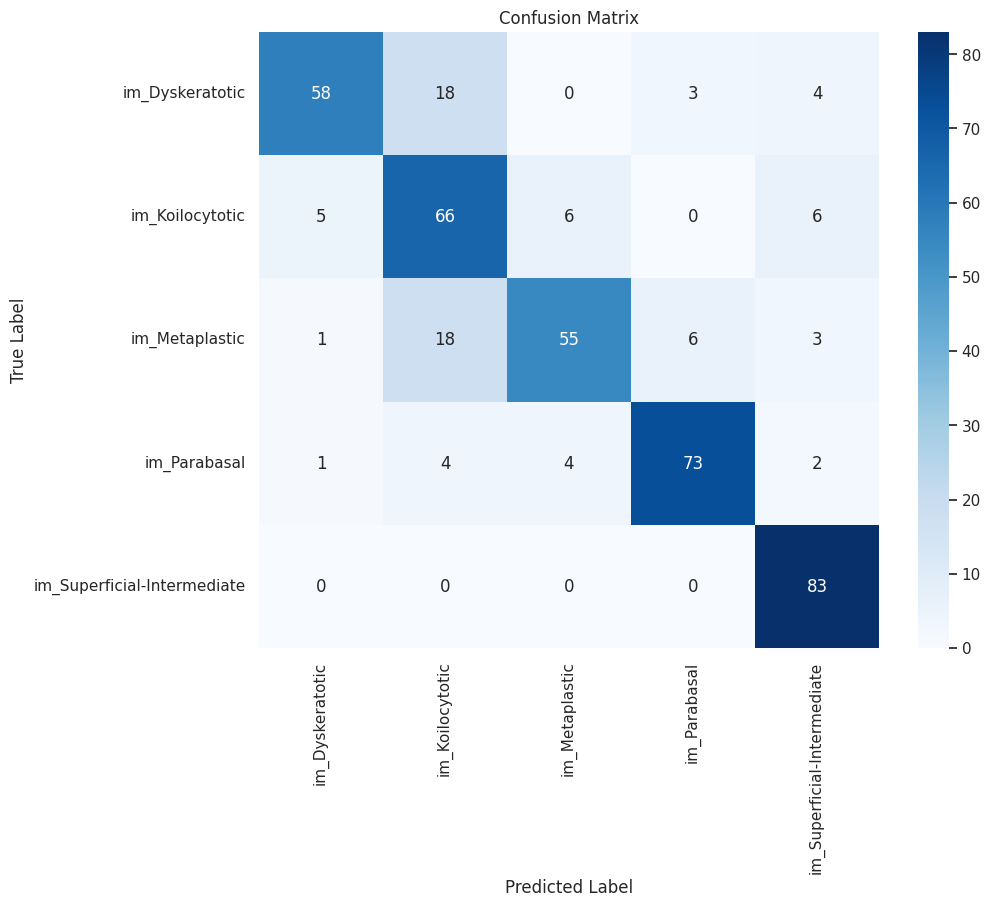

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_xception_model(input_shape):

    base_model = Xception(weights='imagenet', input_shape=input_shape, include_top=False)

    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential()
    model.add(base_model)
    model.add(GaussianNoise(0.25))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(GaussianNoise(0.25))
    model.add(Dropout(0.25))
    model.add(Dense(5, activation='softmax'))

    return model

input_shape = (224, 224, 3)
cnn_model = create_xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 48s 155ms/step - accuracy: 0.5882 - loss: 1.1527 - val_accuracy: 0.8675 - val_loss: 0.5638
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.8520 - loss: 0.4478 - val_accuracy: 0.8867 - val_loss: 0.3534
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.8761 - loss: 0.3404 - val_accuracy: 0.9060 - val_loss: 0.2950
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.8981 - loss: 0.2843 - val_accuracy: 0.9012 - val_loss: 0.3041
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.9312 - loss: 0.2020 - val_accuracy: 0.8940 - val_loss: 0.3219
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - accuracy: 0.9345 - loss: 0.1905 - val_accuracy: 0.9012 - val_loss: 0.2766
Epoch 7/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.9508 - loss: 0.1327 - val_accuracy: 0.9060 - val_loss: 0.2866
Epoch 8/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.9627 - loss: 0.1217 -

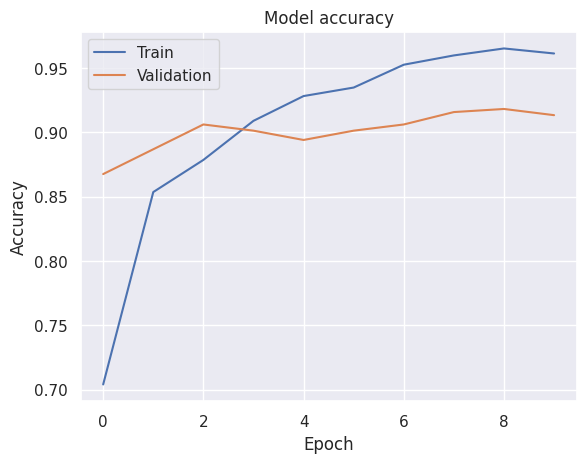

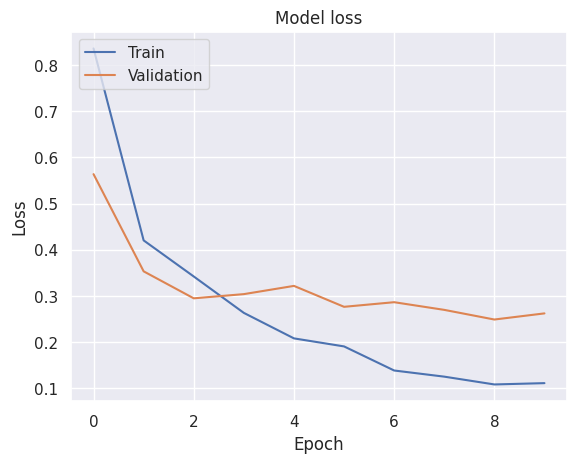

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step


In [ ]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

                             precision    recall  f1-score   support

            im_Dyskeratotic       0.94      0.92      0.93        83
            im_Koilocytotic       0.83      0.86      0.84        83
             im_Metaplastic       0.87      0.86      0.86        83
               im_Parabasal       0.96      0.96      0.96        84
im_Superficial-Intermediate       0.98      0.98      0.98        83

                   accuracy                           0.91       416
                  macro avg       0.91      0.91      0.91       416
               weighted avg       0.91      0.91      0.91       416



In [ ]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

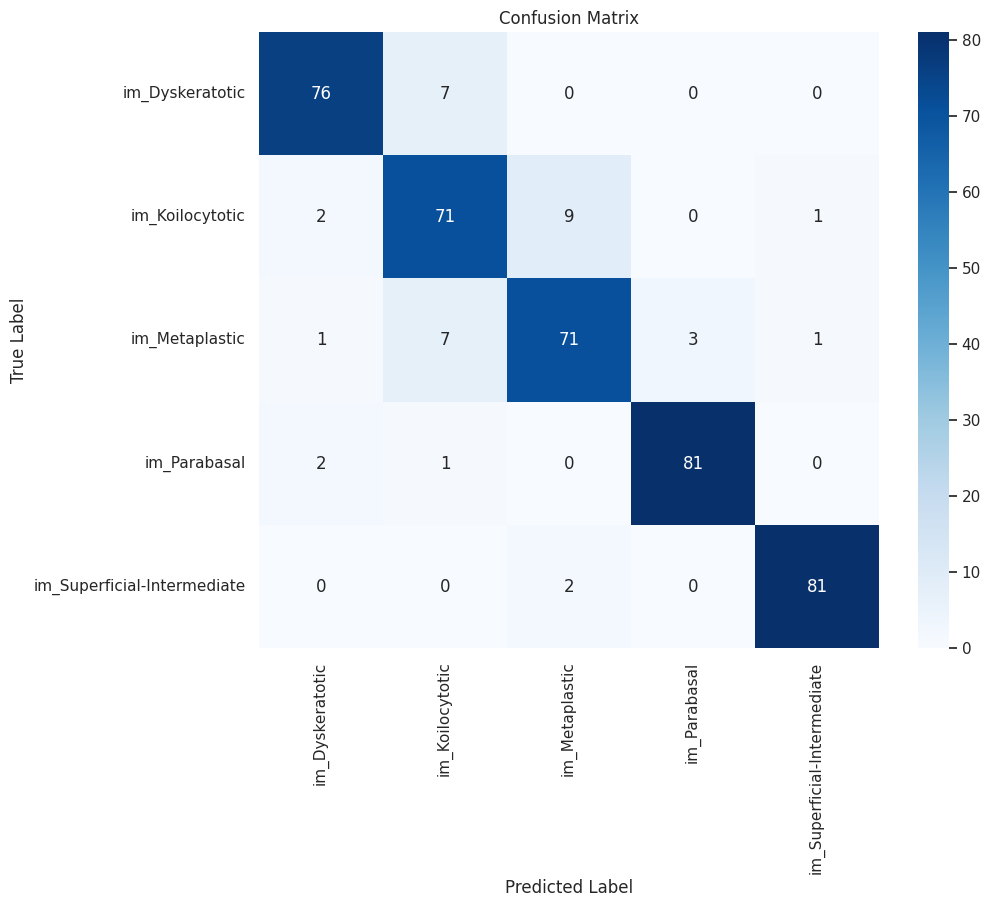

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_xception_model(input_shape):

    inputs = Input(shape=input_shape)

    base_model = Xception(weights='imagenet', input_tensor=inputs, include_top=False)

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 2048
    x = Reshape((height * width, channels))(x)

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)

    attention_output = Reshape((height, width, channels))(attention_output)

    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(5, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 71s 279ms/step - accuracy: 0.7046 - loss: 0.8730 - val_accuracy: 0.8602 - val_loss: 0.3902
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 46s 220ms/step - accuracy: 0.8639 - loss: 0.3998 - val_accuracy: 0.8096 - val_loss: 0.6534
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 45s 216ms/step - accuracy: 0.8819 - loss: 0.3438 - val_accuracy: 0.8458 - val_loss: 0.5687
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 46s 218ms/step - accuracy: 0.9143 - loss: 0.2586 - val_accuracy: 0.8361 - val_loss: 0.6842
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 45s 217ms/step - accuracy: 0.9420 - loss: 0.1728 - val_accuracy: 0.8602 - val_loss: 0.6785


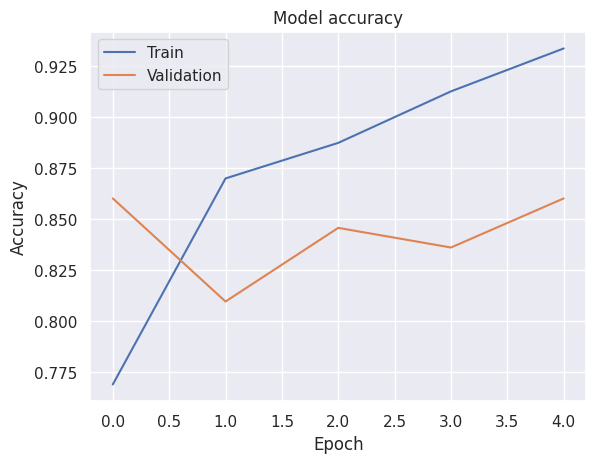

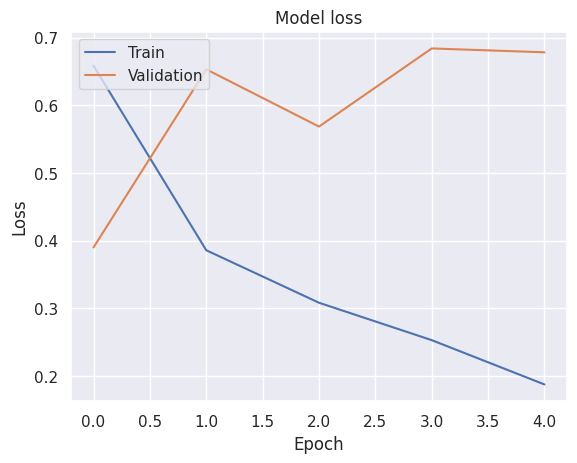

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step


In [ ]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

                             precision    recall  f1-score   support

            im_Dyskeratotic       0.80      0.92      0.85        83
            im_Koilocytotic       0.79      0.75      0.77        83
             im_Metaplastic       0.84      0.69      0.75        83
               im_Parabasal       0.80      0.87      0.83        84
im_Superficial-Intermediate       0.94      0.95      0.95        83

                   accuracy                           0.83       416
                  macro avg       0.84      0.83      0.83       416
               weighted avg       0.84      0.83      0.83       416



In [ ]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

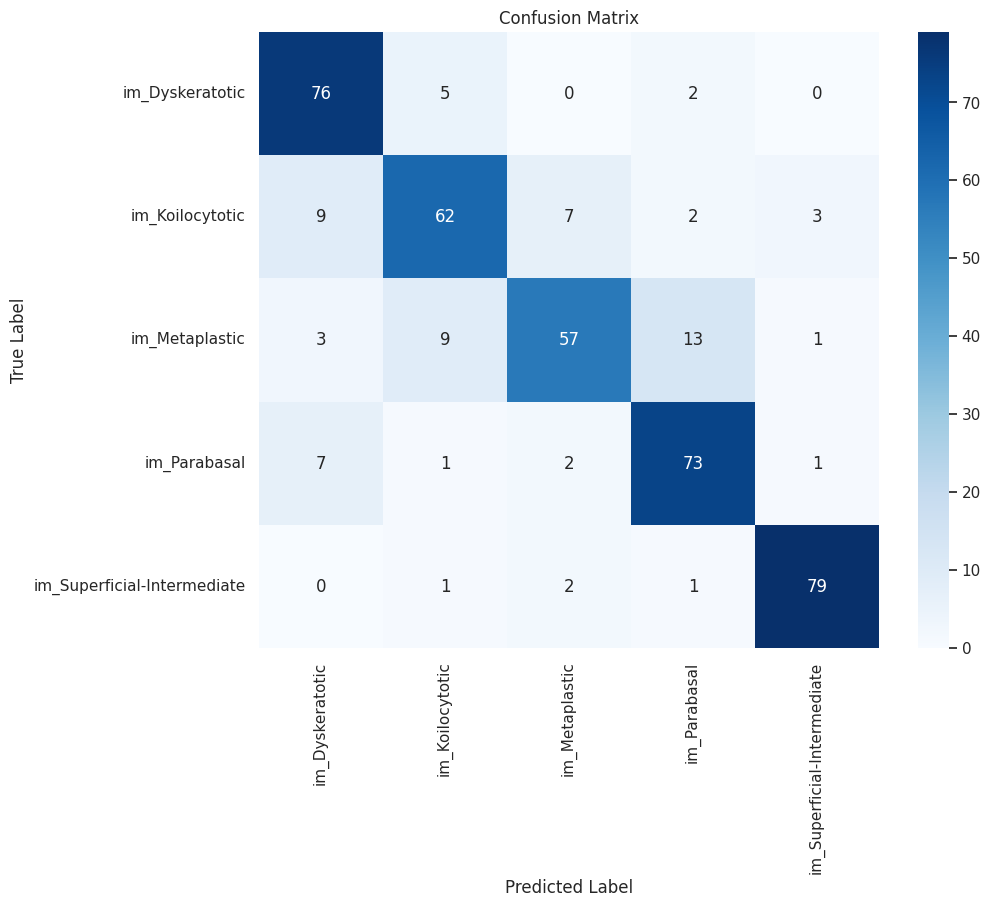

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_inception_model(input_shape):

    inputs = Input(shape=input_shape)

    base_model = InceptionV3(weights='imagenet', input_tensor=inputs, include_top=False)

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 5, 5, 2048
    x = Reshape((height * width, channels))(x)

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)

    attention_output = Reshape((height, width, channels))(attention_output)

    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(5, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_inception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10


I0000 00:00:1730023542.435232    1071 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



  4/208 ━━━━━━━━━━━━━━━━━━━━ 24s 121ms/step - accuracy: 0.3138 - loss: 1.9115

I0000 00:00:1730023561.081273    1103 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.6787 - loss: 0.8931

I0000 00:00:1730023606.201949    1131 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



208/208 ━━━━━━━━━━━━━━━━━━━━ 88s 291ms/step - accuracy: 0.6790 - loss: 0.8921 - val_accuracy: 0.8530 - val_loss: 0.4601
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 26s 124ms/step - accuracy: 0.8571 - loss: 0.3943 - val_accuracy: 0.8506 - val_loss: 0.5161
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 27s 127ms/step - accuracy: 0.9066 - loss: 0.2546 - val_accuracy: 0.3518 - val_loss: 4.8791
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 26s 124ms/step - accuracy: 0.9366 - loss: 0.1814 - val_accuracy: 0.7036 - val_loss: 1.3116
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 26s 124ms/step - accuracy: 0.9470 - loss: 0.1408 - val_accuracy: 0.7277 - val_loss: 1.3212


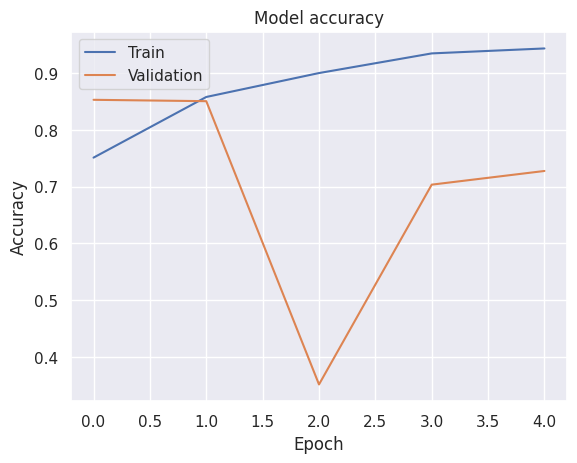

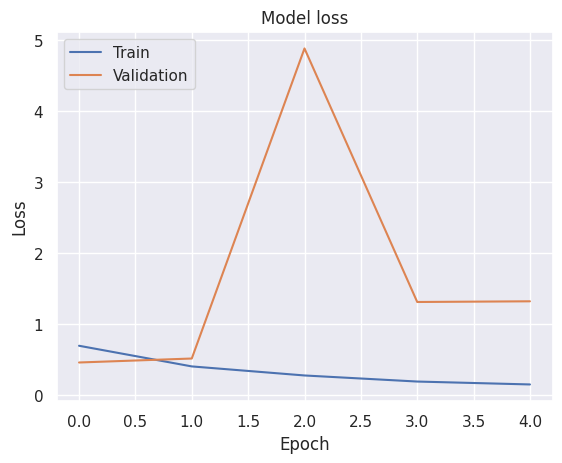

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step


In [ ]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

                             precision    recall  f1-score   support

            im_Dyskeratotic       0.86      0.81      0.83        83
            im_Koilocytotic       0.72      0.76      0.74        83
             im_Metaplastic       0.92      0.58      0.71        83
               im_Parabasal       0.78      0.95      0.86        84
im_Superficial-Intermediate       0.85      0.99      0.92        83

                   accuracy                           0.82       416
                  macro avg       0.83      0.82      0.81       416
               weighted avg       0.83      0.82      0.81       416



In [ ]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

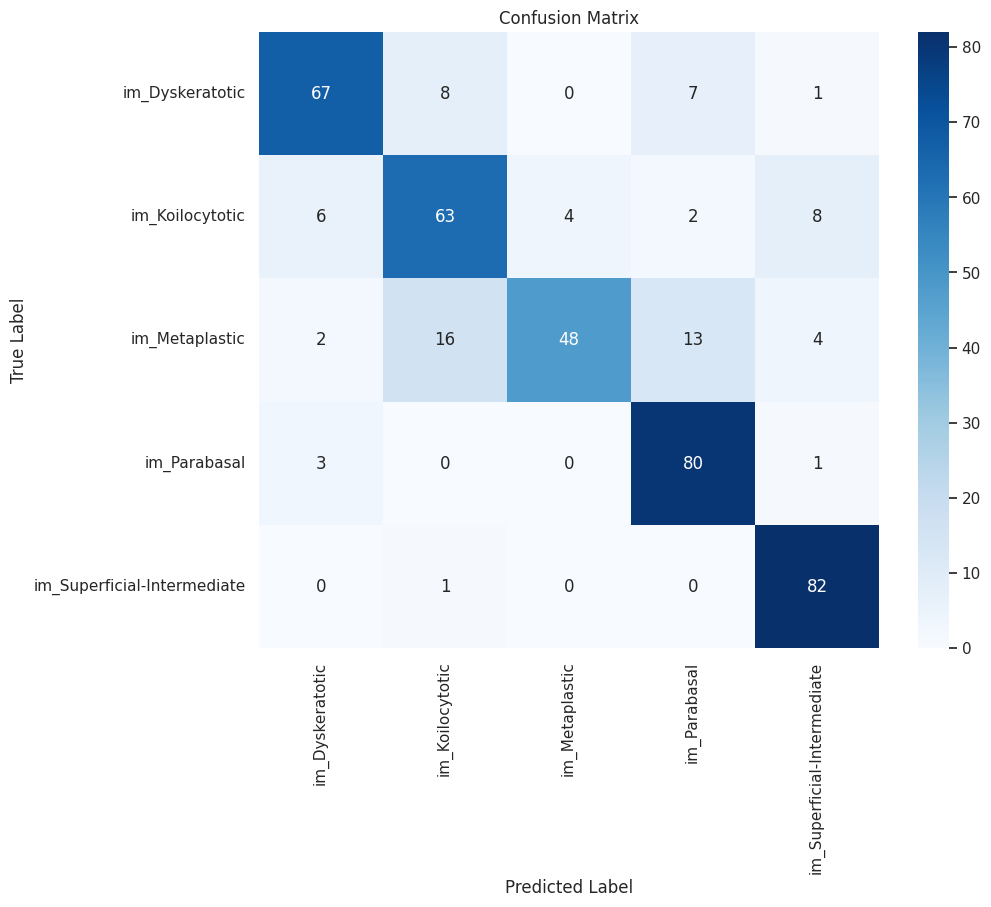

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

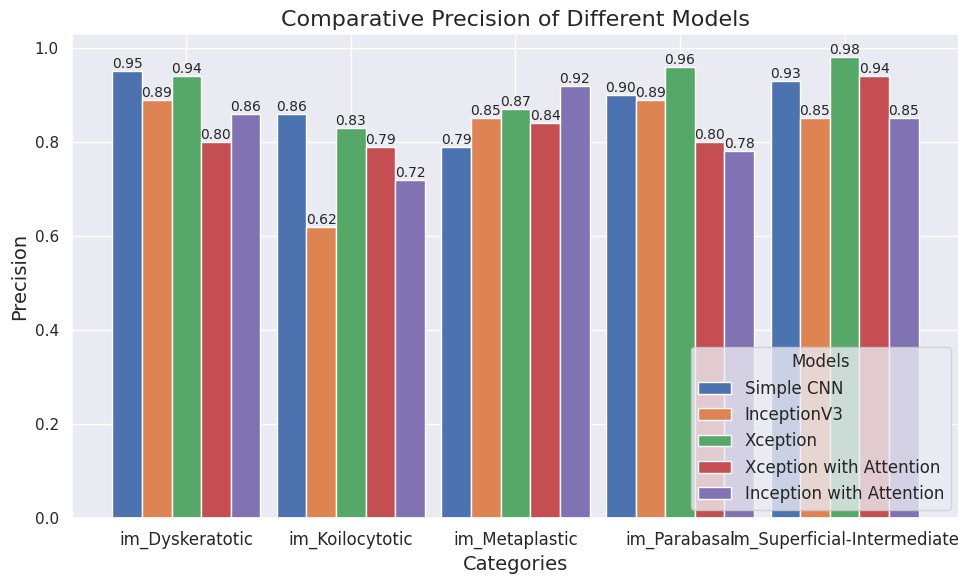

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = {
    'Category': [
        'im_Dyskeratotic',
        'im_Koilocytotic',
        'im_Metaplastic',
        'im_Parabasal',
        'im_Superficial-Intermediate'
    ],
    'Simple CNN': [0.95, 0.86, 0.79, 0.90, 0.93],
    'InceptionV3': [0.89, 0.62, 0.85, 0.89, 0.85],
    'Xception': [0.94, 0.83, 0.87, 0.96, 0.98],
    'Xception with Attention': [0.80, 0.79, 0.84, 0.80, 0.94],
    'Inception with Attention': [0.86, 0.72, 0.92, 0.78, 0.85]
}

df = pd.DataFrame(data)
df.set_index('Category', inplace=True)

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.18
x = np.arange(len(df.index))

for i, model in enumerate(df.columns):
    bars = ax.bar(x + i * bar_width, df[model], width=bar_width, label=model)
    for bar in bars:
        yval = bar.get_height()
        ax.annotate(f'{yval:.2f}', xy=(bar.get_x() + bar.get_width() / 2, yval),
                    ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Categories', fontsize=14)
ax.set_ylabel('Precision', fontsize=14)
ax.set_title('Comparative Precision of Different Models', fontsize=16)
ax.set_xticks(x + bar_width * 2)
ax.set_xticklabels(df.index, fontsize=12)
ax.legend(title='Models', fontsize=12, loc='lower right')

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization, Embedding, Bidirectional
from tensorflow.keras.optimizers import Adam

def create_rnn_model(input_shape, vocab_size=5000, embedding_dim=128, lstm_units=256):
    inputs = Input(shape=input_shape)
    x = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_shape[0])(inputs)
    x = Bidirectional(LSTM(units=lstm_units, return_sequences=True))(x)
    x = Dropout(0.3)(x)
    x = Bidirectional(LSTM(units=lstm_units // 2))(x)
    x = BatchNormalization()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(5, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

rnn_model = create_rnn_model(input_shape=(100,))
rnn_model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Model summary
rnn_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_3 (Embedding)              │ (None, 100, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_6 (Bidirectional)      │ (None, 100, 512)            │         788,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 512)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ (None, 256)                 │         656,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,152,965 (8.21 MB)

 Trainable params: 2,152,453 (8.21 MB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
history = rnn_model.fit(
    train_gen_new,  # Training data generator
    validation_data=valid_gen_new,  # Validation data generator
    epochs=10,  # Number of training epochs
    callbacks=[early_stopping],  # Early stopping to prevent overfitting
    verbose=1  # Show training progress
)

NameError: name 'train_gen_new' is not defined